# MOVIE TITLES METADATA

## 1) Title  Analysis

Compute analyses on the tites of the movies and count which frequency of word in Titles

In [1]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mtala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Read the contents of the text file
file_path = r'C:\Users\mtala\Downloads\archive\movie_titles_metadata.txt'
with open(file_path, 'r', encoding='latin-1') as f:
    lines = f.readlines()

# Extracting information from each line
data = []
for line in lines:
    parts = line.strip().split(" +++$+++ ")
    movie_id, title, year, rating, votes, genres = parts
    # Cleaning up the genres field
    genres = eval(genres) if genres != "['']" else []
    data.append([movie_id, title, year, rating, votes, genres])

In [4]:
# Creating a DataFrame
columns = ['movieID', 'title', 'year', 'rating', 'votes', 'genres']
df = pd.DataFrame(data, columns=columns)

In [5]:
# Combine all titles into a single text
all_titles = ' '.join(df['title'])

In [6]:
# Use NLTK to process the text and filter out stop words
stop_words = set(stopwords.words('english'))
tokens = nltk.word_tokenize(all_titles)
filtered_words = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

# Create a frequency distribution of words
fdist = nltk.FreqDist(filtered_words)

In [10]:
# Extract the top 20 words and their frequencies
top_words = [word[0] for word in fdist.most_common(20)]
top_freqs = [word[1] for word in fdist.most_common(20)]

In [11]:
# Create a DataFrame from top_words and top_freqs
top_words_df = pd.DataFrame({'Word': top_words, 'Frequency': top_freqs})

# Save the DataFrame to a JSON file
json_file_path = 'top_words_frequency.json'
top_words_df.to_json(json_file_path, orient='records')

print("DataFrame saved to:", json_file_path)

DataFrame saved to: top_words_frequency.json


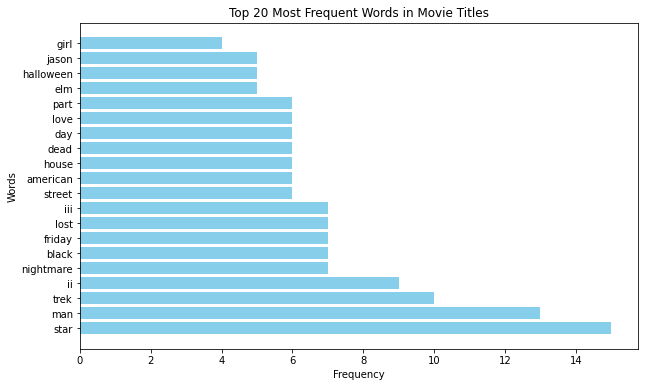

In [12]:
# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words in Movie Titles')
plt.show()

## 2) Semantic Similarity

Compute the semantic similarity between movie titles or genres using word embeding,to measure how closely related different movies are in terms of their titles or genres

In [4]:
import pandas as pd
import spacy
from sklearn.metrics.pairwise import cosine_similarity

# Load spaCy model with word embeddings
nlp = spacy.load("en_core_web_md")

file_path = r'C:\Users\mtala\Downloads\archive\movie_titles_metadata.txt'
with open(file_path, 'r', encoding='latin-1') as f:
    lines = f.readlines()

In [5]:
# Extracting information from each line
data = []
for line in lines:
    parts = line.strip().split(" +++$+++ ")
    movie_id, title, year, rating, votes, genres = parts
    # Cleaning up the genres field
    genres = eval(genres) if genres != "['']" else []
    data.append([movie_id, title, year, rating, votes, genres])


In [6]:
print(data)

[['m0', '10 things i hate about you', '1999', '6.90', '62847', ['comedy', 'romance']], ['m1', '1492: conquest of paradise', '1992', '6.20', '10421', ['adventure', 'biography', 'drama', 'history']], ['m2', '15 minutes', '2001', '6.10', '25854', ['action', 'crime', 'drama', 'thriller']], ['m3', '2001: a space odyssey', '1968', '8.40', '163227', ['adventure', 'mystery', 'sci-fi']], ['m4', '48 hrs.', '1982', '6.90', '22289', ['action', 'comedy', 'crime', 'drama', 'thriller']], ['m5', 'the fifth element', '1997', '7.50', '133756', ['action', 'adventure', 'romance', 'sci-fi', 'thriller']], ['m6', '8mm', '1999', '6.30', '48212', ['crime', 'mystery', 'thriller']], ['m7', 'a nightmare on elm street 4: the dream master', '1988', '5.20', '13590', ['fantasy', 'horror', 'thriller']], ['m8', 'a nightmare on elm street: the dream child', '1989', '4.70', '11092', ['fantasy', 'horror', 'thriller']], ['m9', 'the atomic submarine', '1959', '4.90', '513', ['sci-fi', 'thriller']], ['m10', 'affliction', '19

In [7]:
# Creating a DataFrame
columns = ['movieID', 'title', 'year', 'rating', 'votes', 'genres']
df = pd.DataFrame(data, columns=columns)

In [8]:
df.head()

,movieID,title,year,rating,votes,genres
0,m0,10 things i hate about you,1999,6.90,62847,"[comedy, romance]"
1,m1,1492: conquest of paradise,1992,6.20,10421,"[adventure, biography, drama, history]"
2,m2,15 minutes,2001,6.10,25854,"[action, crime, drama, thriller]"
3,m3,2001: a space odyssey,1968,8.40,163227,"[adventure, mystery, sci-fi]"
4,m4,48 hrs.,1982,6.90,22289,"[action, comedy, crime, drama, thriller]"


In [9]:
# Compute word embeddings for movie titles using spaCy
title_embeddings = [nlp(title).vector for title in df['title']]

In [10]:
# Compute cosine similarity matrix for movie titles
title_similarity_matrix = cosine_similarity(title_embeddings, title_embeddings)

In [11]:
# Convert the similarity matrix to a DataFrame for better visualization
title_similarity_df = pd.DataFrame(title_similarity_matrix, index=df['title'], columns=df['title'])

In [13]:
# Display the similarity matrix
print("Semantic Similarity between Movie Titles:")
title_similarity_df.head()

Semantic Similarity between Movie Titles:


title,10 things i hate about you,1492: conquest of paradise,15 minutes,2001: a space odyssey,48 hrs.,the fifth element,8mm,a nightmare on elm street 4: the dream master,a nightmare on elm street: the dream child,the atomic submarine,...,wild wild west,willow,witness,the wizard of oz,the world is not enough,watchmen,xxx,x-men,young frankenstein,zulu dawn
title,,,,,,,,,,,,,,,,,,,,,
10 things i hate about you,1.000000,-0.163295,0.313553,-0.113521,0.248913,0.062144,0.029793,0.183672,0.169693,0.083598,...,0.118143,0.138436,0.175629,-0.008720,0.279343,0.217462,0.210714,0.008924,0.050591,0.100804
1492: conquest of paradise,-0.163295,1.000000,-0.068711,0.459777,0.119447,0.426468,-0.008862,0.408804,0.398873,0.413215,...,0.151691,0.037950,0.219196,0.577760,0.244219,0.033966,-0.049666,0.104734,0.156396,0.113298
15 minutes,0.313553,-0.068711,1.000000,0.037057,0.498876,0.109168,0.459942,0.241450,0.009204,0.094049,...,0.041717,0.008680,-0.027181,-0.004008,-0.114131,0.096884,-0.098751,0.043422,-0.080119,0.147768
2001: a space odyssey,-0.113521,0.459777,0.037057,1.000000,0.059100,0.487548,0.096902,0.632927,0.600000,0.448108,...,0.032099,0.051021,0.111670,0.317826,0.298375,0.005492,-0.036421,0.165132,0.183265,-0.007229
48 hrs.,0.248913,0.119447,0.498876,0.059100,1.000000,0.190862,0.293672,0.292977,0.180131,0.235407,...,0.116133,-0.026226,0.110143,0.224291,0.142745,0.145846,-0.019163,0.180911,0.019173,0.159958


In [14]:
# Compute word embeddings for genres using spaCy
genre_embeddings = [nlp(" ".join(genres)).vector for genres in df['genres']]

In [15]:
# Compute cosine similarity matrix for genres
genre_similarity_matrix = cosine_similarity(genre_embeddings, genre_embeddings)

In [16]:
# Convert the similarity matrix to a DataFrame for better visualization
genre_similarity_df = pd.DataFrame(genre_similarity_matrix, index=df['title'], columns=df['title'])

In [17]:
print("Semantic Similarity between Movie Titles:")
genre_similarity_df.head()

Semantic Similarity between Movie Titles:


title,10 things i hate about you,1492: conquest of paradise,15 minutes,2001: a space odyssey,48 hrs.,the fifth element,8mm,a nightmare on elm street 4: the dream master,a nightmare on elm street: the dream child,the atomic submarine,...,wild wild west,willow,witness,the wizard of oz,the world is not enough,watchmen,xxx,x-men,young frankenstein,zulu dawn
title,,,,,,,,,,,,,,,,,,,,,
10 things i hate about you,1.000000,0.723030,0.683282,0.486050,0.795829,0.612023,0.622653,0.750194,0.750194,0.436838,...,0.544379,0.809098,0.900117,0.698029,0.611535,0.607533,0.483336,0.397255,0.499147,0.539267
1492: conquest of paradise,0.723030,1.000000,0.702618,0.405335,0.730908,0.540998,0.597300,0.631979,0.631979,0.310585,...,0.467313,0.824312,0.770746,0.767835,0.705160,0.542606,0.614999,0.333799,0.329043,0.770909
15 minutes,0.683282,0.702618,1.000000,0.392648,0.977854,0.605661,0.835891,0.672251,0.672251,0.353707,...,0.535312,0.854317,0.789661,0.570353,0.853741,0.694587,0.886357,0.438510,0.352054,0.758602
2001: a space odyssey,0.486050,0.405335,0.392648,1.000000,0.434301,0.942955,0.393317,0.574576,0.574576,0.975272,...,0.925430,0.502335,0.521827,0.398223,0.435612,0.921897,0.290908,0.940687,0.964580,0.285519
48 hrs.,0.795829,0.730908,0.977854,0.434301,1.000000,0.629415,0.823578,0.726390,0.726390,0.401002,...,0.572450,0.863594,0.850838,0.609166,0.824204,0.707023,0.815888,0.452991,0.423172,0.724060


In [18]:
# Save the genre_similarity_df DataFrame to a JSON file
genre_similarity_df.to_json('genre_similarity_matrix.json')

# Movie Lines

## 1)  Sentiment Analysis

Compute Senitment Analysis of the dialogues of each character and find how positive and how negative their tone is

In [ ]:
import csv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import json

# Read the dataset from a file
dataset_file = r'C:\Users\mtala\Downloads\archive\movie_lines.txt'  # Replace with your file path
with open(dataset_file, 'r') as file:
    data = file.readlines()

# Splitting and cleaning the data
split_data = [line.strip().split(" +++$+++ ") for line in data]
cleaned_data = [[component.strip() for component in line] for line in split_data]

In [ ]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# Applying sentiment analysis
sentiment_results = []
for line in cleaned_data:
    dialogue = line[-1]  # The dialogue text is the last element
    sentiment_score = sia.polarity_scores(dialogue)
    sentiment_results.append({
        "line_id": line[0],
        "character": line[3],
        "dialogue": dialogue,
        "sentiment": sentiment_score
    })

In [ ]:
# Step 3: Aggregate Sentiment Counts

# Set the threshold for considering sentiment as positive or negative
threshold = 0.1  # You can adjust this threshold based on your preference

# Dictionary to store aggregated sentiment counts for each character
sentiment_counts = {"Positive": {}, "Negative": {}}

# Counting positive and negative sentiments for each character
for result in sentiment_results:
    character = result['character']
    sentiment_score = result['sentiment']['compound']

    # Determine sentiment based on the threshold
    sentiment = "Positive" if sentiment_score >= threshold else "Negative"

    # Update sentiment counts for the character
    if character not in sentiment_counts[sentiment]:
        sentiment_counts[sentiment][character] = 1
    else:
        sentiment_counts[sentiment][character] += 1

In [ ]:
# Displaying the aggregated results
for sentiment, counts in sentiment_counts.items():
    print(f"\n{sentiment} Sentiments:")
    for character, count in counts.items():
        print(f"Character: {character}, Count: {count}")

In [ ]:
json_file_path = r'heatmap_data.json' # Replace with your desired file path

json_data = []

# Populate the dictionary with aggregated results
for sentiment, counts in sentiment_counts.items():
    for character, count in counts.items():
        json_data["Sentiments"].append({
            "Sentiment": sentiment,
            "Character": character,
            "Count": count
        })

# Save the dictionary as a JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(json_data, json_file, indent=2)

print(f"Aggregated sentiment counts have been saved to {json_file_path}")

## 2) NER
Extract Part of Speech from each Sentence and combine  it with sentiment analysis to understand how different parts of speech contribute to the overall sentiment of the dialogues

In [32]:
import nltk
import string
import pandas as pd

dataset_file = r'C:\Users\mtala\Downloads\archive\movie_lines.txt'  # Replace with your file path
limit = 15000
with open(dataset_file, 'r') as file:
    data = [next(file) for _ in range(limit)]

In [23]:
# Splitting and cleaning the data
split_data = [line.strip().split(" +++$+++ ") for line in data]
cleaned_data = [[component.strip() for component in line] for line in split_data]

In [24]:
# Download the NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mtala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mtala\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
# Function to perform Part-of-Speech Tagging on a sentence excluding punctuation
def pos_tagging(sentence):
    words = nltk.word_tokenize(sentence)
    # Exclude punctuation marks
    words = [word for word in words if word not in string.punctuation]
    pos_tags = nltk.pos_tag(words)
    return pos_tags

In [31]:
print(pos_tags)

[('Uh-uh', 'JJ'), ('I', 'PRP'), ("'s", 'POS'), ('hitchin', 'PRP'), ('up', 'RP'), ('the', 'DT'), ('interstate', 'NN'), ('when', 'WRB'), ('I', 'PRP'), ('seen', 'VBN'), ('your', 'PRP$'), ('truck', 'NN'), ('outside', 'IN')]


In [26]:
# Mapping of POS abbreviations to full forms
pos_mapping = {
    'CC': 'Coordinating conjunction',
    'IN': 'Preposition',
    'JJ': 'Adjective',
    'MD': 'Modal',
    'NN': 'Noun',
    'NNP': 'Proper noun',
    'PRP': 'Personal pronoun',
    'PRP$': 'Possessive pronoun',
    'RB': 'Adverb',
    'UH': 'Interjection',
    'VB': 'Verb, base form',
    'WP': 'Wh-pronoun',
    'WP$': 'Possessive wh-pronoun',
    'WRB': 'Wh-adverb'
}

In [27]:
# Create a list to store results
results = []

# Apply Part-of-Speech Tagging (excluding punctuation) to each sentence in the dataset
for line in cleaned_data:
    sentence = line[-1]  # Extract the last element (the sentence) from each line
    pos_tags = pos_tagging(sentence)
    
    # Count the occurrences of each POS tag in the sentence
    pos_count = {}
    for word, pos in pos_tags:
        full_pos = pos_mapping.get(pos, pos)
        pos_count[full_pos] = pos_count.get(full_pos, 0) + 1
    
    # Store results in a dictionary
    result_dict = {
        'Sentence': sentence,
        'POS Tags': pos_count
    }
    

    # Append the dictionary to the results list
    results.append(result_dict)

In [28]:
# Create a DataFrame from the results list
df = pd.DataFrame(results)

In [30]:
df.head()

,Sentence,POS Tags
0,They do not!,"{'Personal pronoun': 1, 'VBP': 1, 'Adverb': 1}"
1,They do to!,"{'Personal pronoun': 1, 'VBP': 1, 'TO': 1}"
2,I hope so.,"{'Personal pronoun': 1, 'VBP': 1, 'Adverb': 1}"
3,She okay?,"{'Personal pronoun': 1, 'VBD': 1}"
4,Let's go.,"{'Verb, base form': 2, 'POS': 1}"


In [29]:
# Save the DataFrame to a JSON file
json_file_path = 'pos_tags_output.json'
df.to_json(json_file_path, orient='records', lines=True)

print(f"POS tags have been saved to {json_file_path}")

POS tags have been saved to pos_tags_output.json
